In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, log_loss, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [5]:
data = pd.read_csv('IPM20222023label.csv')

In [6]:
data['kategori'].value_counts()

kategori
Perlu Pembangunan          3378
Tidak Perlu Pembangunan     718
Name: count, dtype: int64

In [7]:
features = ['HLS', 'PPM', 'AHHL', 'AHHP', 'IPM']
target= 'kategori'


In [8]:
data.replace('-', float('nan'), inplace=True)

In [9]:
data.isna().sum()

Nama_Daerah    0
HLS            0
PPM            2
IPM            0
AHHL           0
AHHP           0
kategori       0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
X = data[features]
y = data[target]

In [12]:
y_encoded = pd.factorize(y)[0]
target_names = pd.factorize(y)[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, stratify=y_encoded)

In [13]:
print("Kategori dan Encode:")
for i, category in enumerate(target_names):
    print(f"{category}: {i}")

Kategori dan Encode:
Perlu Pembangunan: 0
Tidak Perlu Pembangunan: 1


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
def print_classification_report_with_loss(model_name, y_true, y_pred, model, X_test_scaled):
    print(f"{model_name} Classification Report:")
    
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_scaled)
        loss = log_loss(y_true, y_pred_prob)
        print(f"Log Loss: {loss:.4f}")
    else:
        print(f"Log Loss: Model does not support probability predictions")
    
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=target_names)
    print(f"Accuracy: {accuracy:.2f}")
    print(report)

In [16]:
def generate_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, 
                         index=[f"Actual {name}" for name in target_names], 
                         columns=[f"Predicted {name}" for name in target_names])
    
    print(f"\nConfusion Matrix for {model_name}:")
    print(cm_df)

    TN = cm[1, 1]
    TP = cm[0, 0]
    FN = cm[0, 1]
    FP = cm[1, 0]
    
    print(f"\nMetrics for {model_name}:")
    print(f"True Positive (TP): {TP}")
    print(f"True Negative (TN): {TN}")
    print(f"False Positive (FP): {FP}")
    print(f"False Negative (FN): {FN}")
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

In [17]:
ann_model = MLPClassifier(random_state=0, max_iter=1000)
svm_model = SVC(random_state=0, probability=True) 

In [19]:
models = {
    "ANN": ann_model,
    "SVM": svm_model
}

Training ANN...
ANN Classification Report:
Log Loss: 0.0432
Accuracy: 0.99
                         precision    recall  f1-score   support

      Perlu Pembangunan       1.00      0.99      0.99      1014
Tidak Perlu Pembangunan       0.95      0.98      0.97       215

               accuracy                           0.99      1229
              macro avg       0.97      0.99      0.98      1229
           weighted avg       0.99      0.99      0.99      1229


Confusion Matrix for ANN:
                                Predicted Perlu Pembangunan  \
Actual Perlu Pembangunan                               1003   
Actual Tidak Perlu Pembangunan                            4   

                                Predicted Tidak Perlu Pembangunan  
Actual Perlu Pembangunan                                       11  
Actual Tidak Perlu Pembangunan                                211  

Metrics for ANN:
True Positive (TP): 1003
True Negative (TN): 211
False Positive (FP): 4
False Negative (FN): 

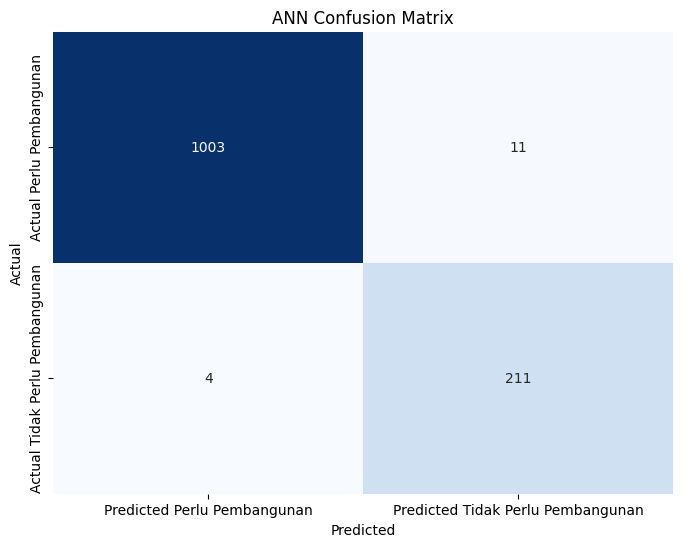

Training SVM...
SVM Classification Report:
Log Loss: 0.0609
Accuracy: 0.97
                         precision    recall  f1-score   support

      Perlu Pembangunan       0.98      0.98      0.98      1014
Tidak Perlu Pembangunan       0.93      0.92      0.92       215

               accuracy                           0.97      1229
              macro avg       0.95      0.95      0.95      1229
           weighted avg       0.97      0.97      0.97      1229


Confusion Matrix for SVM:
                                Predicted Perlu Pembangunan  \
Actual Perlu Pembangunan                                998   
Actual Tidak Perlu Pembangunan                           17   

                                Predicted Tidak Perlu Pembangunan  
Actual Perlu Pembangunan                                       16  
Actual Tidak Perlu Pembangunan                                198  

Metrics for SVM:
True Positive (TP): 998
True Negative (TN): 198
False Positive (FP): 17
False Negative (FN): 

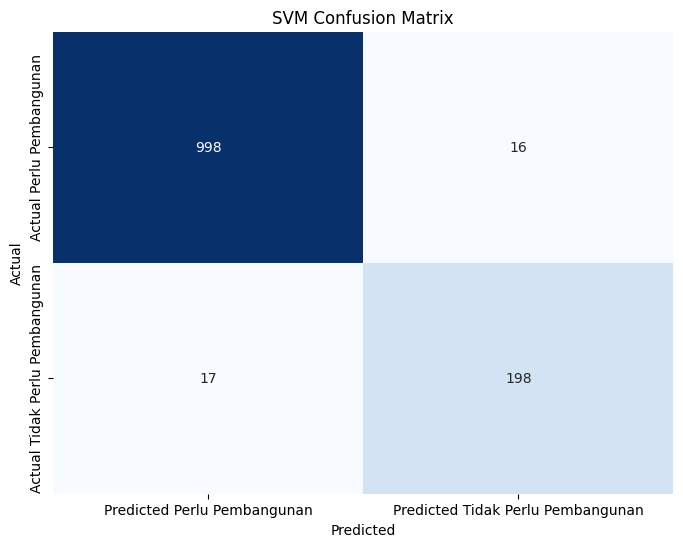

In [20]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print_classification_report_with_loss(model_name, y_test, y_pred, model, X_test_scaled)
    generate_confusion_matrix(y_test, y_pred, model_name)

In [21]:
new_data = pd.read_csv('IPM2024.csv')

new_data.replace('-', float('nan'), inplace=True)
new_data.dropna(inplace=True)

In [22]:
new_data

,nama_daerah,AHHL,AHHP,HLS,IPM,PPM
0,ACEH,68.07,71.94,14.39,74.03,14.23
1,Aceh Barat,65.96,69.93,14.93,73.69,17.60
2,Aceh Barat Daya,63.10,66.93,13.69,68.75,15.32
3,Aceh Besar,67.80,71.69,14.77,75.13,13.21
4,Aceh Jaya,65.19,69.09,14.06,71.83,12.25
...,...,...,...,...,...,...
533,Way Kanan,67.41,71.38,12.44,69.31,10.43
534,Wonogiri,74.44,78.13,12.61,72.55,10.71
535,Wonosobo,70.01,73.84,11.81,69.82,15.28
536,Yahukimo,64.15,67.94,8.05,51.98,33.82


In [23]:
X_new = new_data[features]

X_new_scaled = scaler.transform(X_new)

In [24]:
ann_predictions = ann_model.predict(X_new_scaled)
ann_predicted_labels = target_names[ann_predictions]
new_data_ann = new_data.copy()
new_data_ann['Predicted_ANN'] = ann_predicted_labels

new_data_ann.to_csv('IPM2024_with_ann.csv', index=False)

In [25]:
data_2024 = pd.read_csv('IPM2024_with_ann.csv')

In [26]:
data_2024['Predicted_ANN'].value_counts()

Predicted_ANN
Tidak Perlu Pembangunan    341
Perlu Pembangunan          197
Name: count, dtype: int64

In [27]:
perlu_pembangunan = data_2024[data_2024["Predicted_ANN"] == "Perlu Pembangunan"]

print("Daerah yang perlu pembangunan:")
for daerah in perlu_pembangunan["nama_daerah"]:
    print(daerah)

Daerah yang perlu pembangunan:
Aceh Barat Daya
Aceh Selatan
Alor
Asmat
Bandung Barat
Banggai Kepulauan
Banggai Laut
Bangka Selatan
Bangkalan
Banjarnegara
Banyu Asin
Barito Kuala
Belu
Biak Numfor
Bima
Boalemo
Bolaang Mongondow Selatan
Bolaang Mongondow Timur
Bolaang Mongondow Utara
Bombana
Bondowoso
Bone
Boven Digoel
Brebes
Buru
Buru Selatan
Buton
Buton Selatan
Buton Tengah
Cianjur
Deiyai
Dogiyai
Donggala
Empat Lawang
Ende
Flores Timur
Garut
Gayo Lues
Gorontalo
Gorontalo Utara
Halmahera Barat
Halmahera Selatan
Halmahera Tengah
Halmahera Timur
Hulu Sungai Selatan
Hulu Sungai Tengah
Hulu Sungai Utara
Indragiri Hilir
Indramayu
Intan Jaya
Jayawijaya
Jember
Jeneponto
Kaimana
Kapuas Hulu
Katingan
Kaur
Kayong Utara
Keerom
Kepulauan Aru
Kepulauan Mentawai
Kepulauan Meranti
Kepulauan Sula
Kepulauan Yapen
Ketapang
Konawe Kepulauan
Kota Cilegon
Kota Pagar Alam
Kota Subulussalam
Kota Tanjung Balai
Kota Tual
Kupang
Lahat
Lampung Barat
Lampung Utara
Landak
Lanny Jaya
Lebak
Lebong
Lembata
Lingga
Lombo

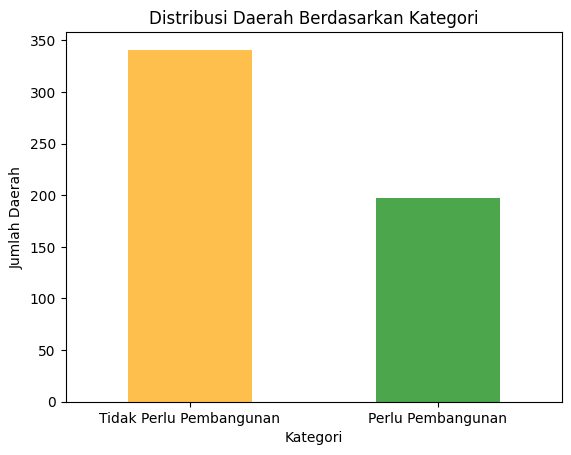

In [28]:
kategori_counts = data_2024["Predicted_ANN"].value_counts()

kategori_counts.plot(kind="bar", color=["orange", "green"], alpha=0.7)
plt.title("Distribusi Daerah Berdasarkan Kategori")
plt.ylabel("Jumlah Daerah")
plt.xlabel("Kategori")
plt.xticks(rotation=0)
plt.show()


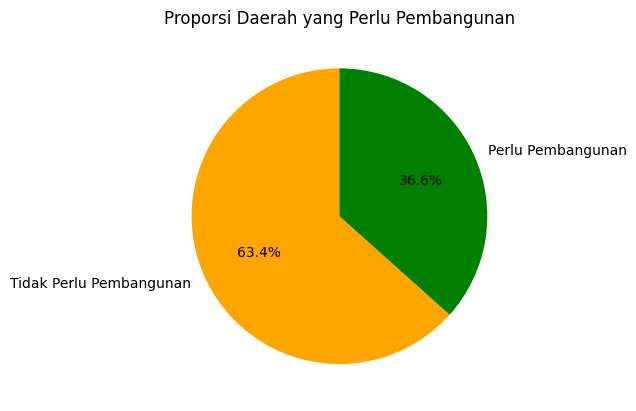

In [29]:
kategori_counts.plot(kind="pie", autopct="%1.1f%%", colors=["orange", "green"], startangle=90)
plt.title("Proporsi Daerah yang Perlu Pembangunan")
plt.ylabel("")
plt.show()


Kalau dari SVC

In [30]:
svc_predictions = svm_model.predict(X_new_scaled)
svc_predicted_labels = target_names[svc_predictions]

new_data_svc = new_data.copy()
new_data_svc['Predicted_SVC'] = svc_predicted_labels

new_data_svc.to_csv('IPM2024_with_svc.csv', index=False)

In [33]:
data_2024_svc = pd.read_csv('IPM2024_with_SVC.csv')

In [34]:
data_2024_svc['Predicted_SVC'].value_counts()

Predicted_SVC
Tidak Perlu Pembangunan    327
Perlu Pembangunan          211
Name: count, dtype: int64

In [37]:
perlu_pembangunan_svc = data_2024_svc[data_2024_svc["Predicted_SVC"] == "Perlu Pembangunan"]

print("Daerah yang perlu pembangunan:")
for daerah in perlu_pembangunan_svc["nama_daerah"]:
    print(daerah)

Daerah yang perlu pembangunan:
Aceh Barat Daya
Aceh Selatan
Aceh Singkil
Aceh Timur
Alor
Asmat
Banggai Kepulauan
Banggai Laut
Bangka Selatan
Bangkalan
Banjar
Banjarnegara
Banyu Asin
Barito Kuala
Batu Bara
Belu
Bengkulu Selatan
Bengkulu Tengah
Bengkulu Utara
Biak Numfor
Bima
Boalemo
Bolaang Mongondow
Bolaang Mongondow Selatan
Bolaang Mongondow Timur
Bolaang Mongondow Utara
Bombana
Bondowoso
Bone
Boven Digoel
Brebes
Buol
Buru
Buru Selatan
Buton
Buton Selatan
Buton Tengah
Cianjur
Deiyai
Dogiyai
Dompu
Donggala
Empat Lawang
Ende
Fakfak
Flores Timur
GORONTALO
Garut
Gayo Lues
Gorontalo
Gorontalo Utara
Halmahera Barat
Halmahera Selatan
Halmahera Tengah
Halmahera Timur
Hulu Sungai Selatan
Hulu Sungai Tengah
Hulu Sungai Utara
Indragiri Hilir
Intan Jaya
Jayawijaya
Jeneponto
Kaimana
Katingan
Kaur
Kayong Utara
Keerom
Kepahiang
Kepulauan Anambas
Kepulauan Aru
Kepulauan Mentawai
Kepulauan Meranti
Kepulauan Selayar
Kepulauan Sula
Kepulauan Yapen
Ketapang
Konawe Kepulauan
Kota Pagar Alam
Kota Subulussa

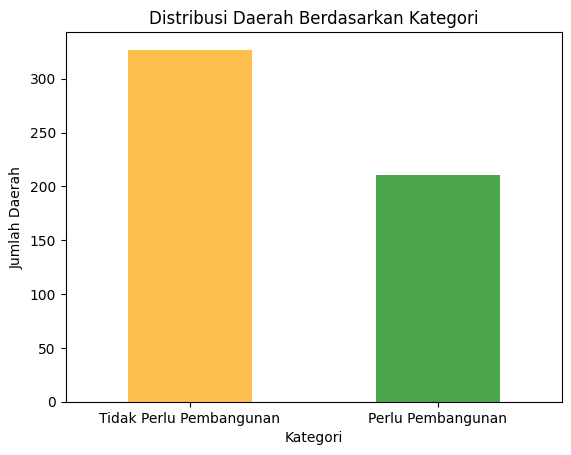

In [38]:
kategori_counts_svc = data_2024_svc["Predicted_SVC"].value_counts()

kategori_counts_svc.plot(kind="bar", color=["orange", "green"], alpha=0.7)
plt.title("Distribusi Daerah Berdasarkan Kategori")
plt.ylabel("Jumlah Daerah")
plt.xlabel("Kategori")
plt.xticks(rotation=0)
plt.show()

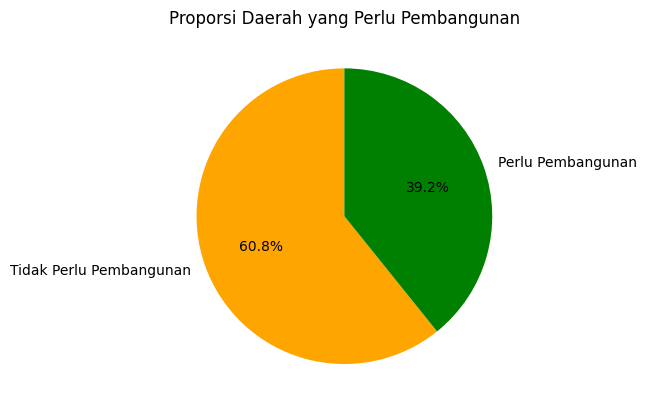

In [39]:
kategori_counts_svc.plot(kind="pie", autopct="%1.1f%%", colors=["orange", "green"], startangle=90)
plt.title("Proporsi Daerah yang Perlu Pembangunan")
plt.ylabel("")
plt.show()